In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Linear Regression Code

def standard_units(nums):
    return (nums - np.mean(nums)) / np.std(nums)

def correlation(t,x,y):
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t,x,y):
    r = correlation(t,x,y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t,x,y):
    r = correlation(t,x,y)
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))


# Least Squares

In [4]:
little_women = Table.read_table('little_women.csv')
little_women = little_women.move_to_start('Periods')
little_women.show(3)

Periods,Characters
189,21759
188,22148
231,20558


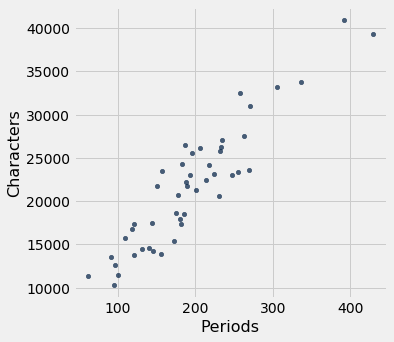

In [5]:
little_women.scatter(0,1)

In [6]:
correlation(little_women,'Periods','Characters')

0.9229576895854816

In [7]:
def fit(t,x,y):
    # return the predicted y-value for each x-value
    a = slope(t,x,y)
    b = intercept(t,x,y)
    return a * t.column(x) + b

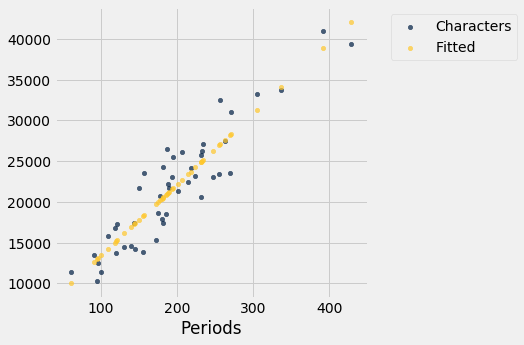

In [8]:
little_women.with_column('Fitted',fit(little_women,0,1)).scatter('Periods')

In [16]:
# back to slides to discuss least squares + error in estimation

example_points

[['P', 'e'], ['C', 'h']]

In [19]:
sample = little_women.sample(5)
example_points = []
for ind in range(5):
    example_points.append([sample.column(0).take(ind),sample.column(1).take(ind)])

def lw_errors(slope,intercept):
    little_women.scatter('Periods','Characters')
    xlims = np.array([50,450])
    plt.plot(xlims, slope * xlims + intercept, lw = 2)
    for x, y in example_points:
        plt.plot([x,x], [y,slope*x+intercept], color='r',lw=2)

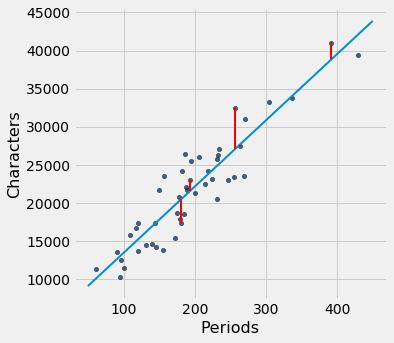

In [20]:
lw_slope = slope(little_women,0,1)
lw_intercept = intercept(little_women,0,1)
lw_errors(lw_slope,lw_intercept)

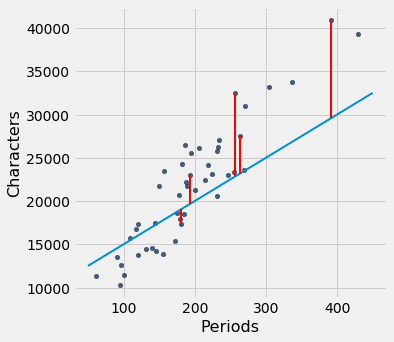

In [21]:
# what if we didn't know the slope or intercept?
lw_errors(50,10000)

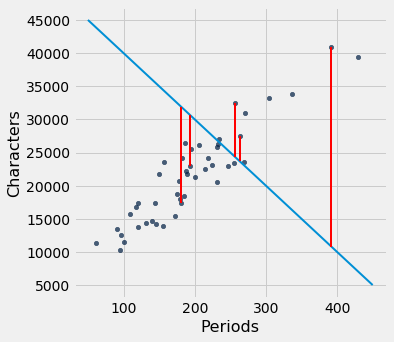

In [22]:
lw_errors(-100,50000)

In [24]:
# let's define the error
def lw_rmse(slope,intercept):
    lw_errors(slope,intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = slope * x + intercept
    error = np.sqrt(np.mean((y - fitted) ** 2))
    return error

12546.311277855777

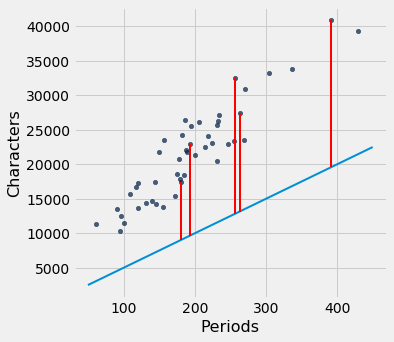

In [28]:
lw_rmse(50,10)

16710.11983735375

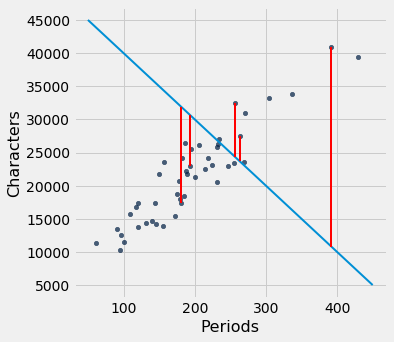

In [29]:
lw_rmse(-100,50000)

2715.5391063834586

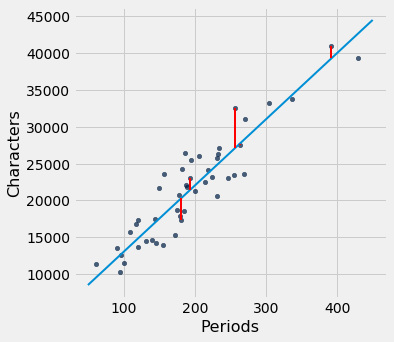

In [30]:
lw_rmse(90,4000) # looking better

2701.690785311856

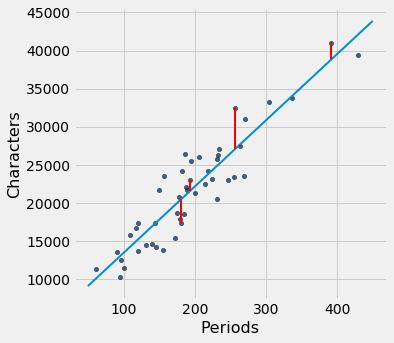

In [31]:
lw_rmse(lw_slope,lw_intercept) # there we go!

In [ ]:
# back to slides

# Numerical Optimization

In [42]:
def f(x):
    return (x - 3) ** 2 + 1

[f(1), f(2), f(3), f(4), f(5)]

[5, 2, 1, 2, 5]

In [43]:
minimize(f)

2.999999999968361

In [57]:
def f(x,y):
    return y**2 + x**2

[f(-2,-2),f(-1,-1),f(0,0),f(1,1),f(2,2)]



[8, 2, 0, 2, 8]

In [58]:
minimize(f)

array([0., 0.])

Best Slope:  86.97784125845317
Best Intercept:  4744.784814765519


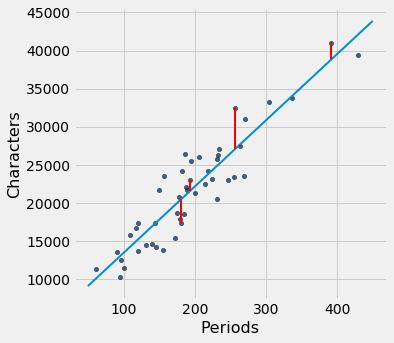

In [44]:
def lw_rmse(slope,intercept):
#     lw_errors(slope,intercept)
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = slope * x + intercept
    error = np.sqrt(np.mean((y - fitted) ** 2))
    return error

best_vals = minimize(lw_rmse)
print('Best Slope: ', best_vals[0])
print('Best Intercept: ', best_vals[1])
lw_errors(best_vals[0],best_vals[1])

In [45]:
lw_slope, lw_intercept

(86.97784125829821, 4744.784796574928)

In [ ]:
# Non-linear regression

In [59]:
shotput = Table.read_table('shotput.csv')
shotput.show(3)

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4


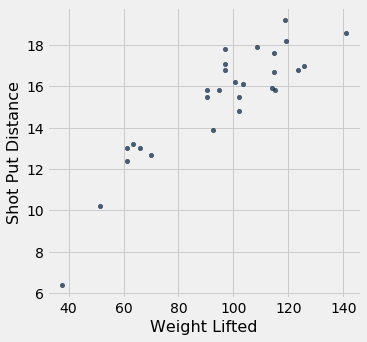

In [60]:
shotput.scatter(0)

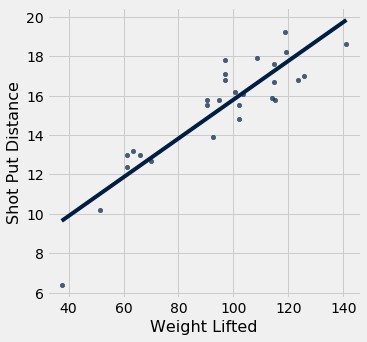

In [61]:
shotput.scatter(0,fit_line=True)

This line is the minimizing line of the form: $ ax + b $

Could instead try to find best quadratic curve:
$ ax^2 + bx + c $

In [73]:
def shotput_quad_rmse(a,b,c):
    x = shotput.column(0)
    y = shotput.column(1)
    fitted = a*(x**2) + b*x + c
    error = np.sqrt(np.mean((y - fitted) ** 2))
    return error

In [74]:
a, b, c = minimize(shotput_quad_rmse)
a, b, c

(-0.001040037312528357, 0.28270600307471794, -1.5316761846076272)

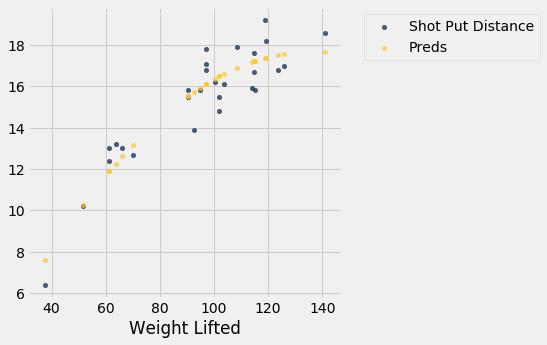

In [77]:
preds = a * shotput.column(0) ** 2 + b * shotput.column(0) + c
shotput.with_column('Preds',preds).scatter(0)